In [1]:
from utils import dele_attr, cropped_pcd, new_pointcloud, replace_points, slope_corrupt, slope_corrupt
import numpy as np
import open3d
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
attr_map = np.load("source_data_22_7_21_1140/attri_map_22_7_21_1140.npy")
pcl = np.load("source_data_22_7_21_1140/pcl_22_7_21_1140.npy")
#pcl = np.load("source_data_22_7_21_1127/pcl_22_7_21_1127.npy")
box = np.load("source_data_22_7_21_1140/base_det_boxes_22_7_21_1140.npy")

In [3]:
attr_map1, pt_list = dele_attr(attr_map[0, :], level=0.7)
new_pcl = new_pointcloud(pcl, pt_list)
points = cropped_pcd(new_pcl, box[0, :])
print(points.shape)

[   65.    79.   144. ... 28396. 28401. 28404.]
(3593, 4)
(98, 3)


对点云进行简单的处理(jitter)

In [4]:
from corruption_utils import corrupt_jitter
points2 = corrupt_jitter(points, 2)
print(points.shape)

(98, 3)


可视化（显示多个点云）

In [5]:
pts = open3d.geometry.PointCloud()
pts.points = open3d.utility.Vector3dVector(points[:, :3])
pts.paint_uniform_color([0, 1, 0])
#open3d.visualization.draw_geometries([pts])
pts2 = open3d.geometry.PointCloud()
pts2.points = open3d.utility.Vector3dVector(points2[:, :3])
pts2.paint_uniform_color([1, 0, 0])
#open3d.visualization.draw_geometries([pts, pts2])


PointCloud with 98 points.

rotate处理

In [6]:
from corruption_utils import corrupt_rotate
points3 = corrupt_rotate(points, 3)
print(points3.shape)

(98, 3)


rotate可视化

In [7]:
pts = open3d.geometry.PointCloud()
pts.points = open3d.utility.Vector3dVector(points[:, :3])
pts.paint_uniform_color([0, 1, 0])
#open3d.visualization.draw_geometries([pts])
pts3 = open3d.geometry.PointCloud()
pts3.points = open3d.utility.Vector3dVector(points3[:, :3])
pts3.paint_uniform_color([1, 0, 0])
#open3d.visualization.draw_geometries([pts, pts3])

PointCloud with 98 points.

将rotate 完成的点放回到原文件中

from utils import visualize_attr_map
rotate_points= replace_points(pcl, points, points3)


根据bbox中的点建立另一个索引列表

point_crop(pcl,box)

jitter_2*2

In [8]:
from operator import index
import os
os.makedirs
level = 5
time = 2
points_jitter = corrupt_jitter(points, level)
x=0
while x <time:
    points_jitter = corrupt_jitter(points_jitter, level)
    x = x+1
jitter, index = replace_points(pcl, points, points_jitter)
print(index)
#np.save("jitter\jitter_5_200_", jitter)



[1772. 1774. 1775. 1776. 1777. 1779. 1782. 2124. 2134. 2135. 2457. 2458.
 2459. 2460. 2461. 2462. 2466. 2474. 2787. 2788. 2789. 2790. 3114. 3115.
 3117. 3118. 3130. 3132. 3133. 3476. 3484. 3491. 3874. 3878. 3885. 3892.
 3894. 3895. 3896. 3897. 3898. 3899. 3900. 4360. 4362. 4365. 4366. 4367.
 4368. 4369. 4372. 4373. 4374. 4380. 4381. 4838. 4852. 4853. 4854. 4861.
 5320. 5321. 5330. 5331. 5333. 5334. 5336. 5345. 5346. 5347. 5348. 5355.
 5816. 5818. 5819. 5821. 5822. 5828. 5830. 5831. 5833. 5834. 5835. 5840.
 6308. 6309. 6317. 6318. 6319. 6320. 6321. 6328. 6817. 6820. 6837. 6838.
 7318. 7319.]


jitter可视化

pts = open3d.geometry.PointCloud()
pts.points = open3d.utility.Vector3dVector(points[:, :3])
pts.paint_uniform_color([1, 0, 0])
#open3d.visualization.draw_geometries([pts])
pts_jitter = open3d.geometry.PointCloud()
pts_jitter.points = open3d.utility.Vector3dVector(jitter[:, :3])
#pts_jitter.paint_uniform_color([0, 0, 1])
open3d.visualization.draw_geometries([pts, pts_jitter])

(98,)
[0.44290257 0.45272515 0.4394014  0.45067108 0.45829378 0.45143493
 0.45741652 0.44218311 0.44775648 0.43930669 0.44184687 0.4438971
 0.45715567 0.45833131 0.45043411 0.4538681  0.44832021 0.44930839
 0.45391094 0.445956   0.45488593 0.44331033 0.43689186 0.45310745
 0.47173856 0.43746189 0.44760013 0.44881548 0.44443611 0.44951201
 0.44859546 0.43767136 0.44314898 0.44739991 0.43716088 0.44087668
 0.4410608  0.44690176 0.44785567 0.44227851 0.45133637 0.45721736
 0.44249727 0.45134113 0.44709435 0.44572275 0.43892278 0.44354932
 0.43894184 0.44361848 0.43878816 0.43814603 0.4512144  0.44506864
 0.44256798 0.45007951 0.44527073 0.4473001  0.44647696 0.45987504
 0.44107719 0.45235845 0.43892693 0.44644632 0.43752065 0.45023479
 0.46226719 0.4416084  0.43914106 0.44941268 0.44976141 0.4436453
 0.4551193  0.44992588 0.44718433 0.45154837 0.44242273 0.44178277
 0.45354649 0.44805112 0.44079538 0.44545408 0.44603725 0.46589579
 0.44136823 0.47301776 0.45739354 0.44518575 0.45614375 0.

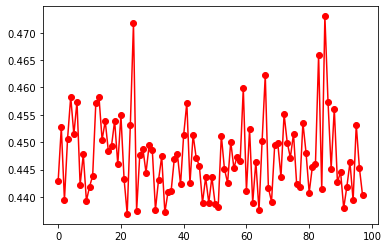

In [9]:
new_attr = np.array([])
print(index.shape)
for i in range(len(index)):
    index1 = index[i-1]
    index1 = np.int(index1)
    new_attr = np.append(new_attr, attr_map[0,index1])
print(new_attr)

plt.plot(new_attr, 'ro-')

caculating the slope of critical points, and randomly move those 
position in limit distance 
    input: 
        pcl(N, 3)
        index(n)

In [10]:
from copy import deepcopy
from random import uniform
a = np.arange(-1, 1)
m =np.random.uniform(-5, 5)

pcl_corrupt = deepcopy(pcl)

x = pcl[:,0]
y = pcl[:,1]
z = pcl[:,2]
d = np.sqrt(np.square(x)+np.square(y))
alpha = np.arctan(y/x)
beta = np.arctan(z/d)
for num in range(len(index)):
    m = np.random.uniform(-1,1)
    n = np.random.uniform(-1,1)
    o = np.random.uniform(-1,1)
    indicies = np.int(index[num])
    pcl_corrupt[indicies][0] =pcl_corrupt[indicies][0] + m*np.cos(beta[num])*np.cos(alpha[num])
    pcl_corrupt[indicies][1] =pcl_corrupt[indicies][1] + m*np.cos(beta[num])*np.sin(alpha[num])
    pcl_corrupt[indicies][2] =pcl_corrupt[indicies][2]+ m*np.sin(beta[num])

 


In [11]:
# pts_slove = open3d.geometry.PointCloud()
# pts_slove.points = open3d.utility.Vector3dVector(pcl_corrupt[:, :3])
# pts_slove.paint_uniform_color([0, 0, 2])
# open3d.visualization.draw_geometries([pts, pts_slove])

In [12]:
slope = np.load("slope/slope_01.npy")
Slope = open3d.geometry.PointCloud()
Slope.points = open3d.utility.Vector3dVector(slope[:, :3])
pts.paint_uniform_color([1,0,0])
open3d.visualization.draw_geometries([Slope, pts])

FileNotFoundError: [Errno 2] No such file or directory: 'slope/slope_01.npy'

In [26]:
slope01 = slope_corrupt(pcl, index, 100)


In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('slope.csv',sep='\\s+', skiprows=[0], header=None)
# print(df)
# df.head(1)
mat = np.array(df)
mat.dtype = 'int'


ParserError: Error tokenizing data. C error: Expected 15 fields in line 7, saw 16
